In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [348]:
df = pd.read_csv("ecommerce_customer_data_large.csv")

In [349]:
df.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
5,13738,2022-08-25 06:48:33,Home,191,3,3722,Credit Card,27,1.0,Lauren Johnson,27,Female,0
6,13738,2023-07-25 05:17:24,Electronics,205,1,2773,Credit Card,27,NaN,Lauren Johnson,27,Female,0
7,13738,2023-02-05 19:31:48,Books,370,5,1486,Cash,27,1.0,Lauren Johnson,27,Female,0
8,13738,2021-12-21 03:29:05,Home,12,2,2175,Cash,27,NaN,Lauren Johnson,27,Female,0
9,13738,2023-02-09 00:53:14,Electronics,40,4,4327,Cash,27,0.0,Lauren Johnson,27,Female,0


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [351]:
df = df.drop(["Customer Age"], axis=1)

In [352]:
df.drop_duplicates(inplace=True)

In [353]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [354]:
df["Returns"] = df["Returns"].map(lambda x: "yes" if x == 0 else "no" if x == 1 else "unknown")
df["Churn"] = df["Churn"].map(lambda x: "yes" if x == 0 else "no" if x == 1 else "unknown")
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,no,John Rivera,31,Female,yes
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,no,John Rivera,31,Female,yes
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,no,John Rivera,31,Female,yes
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,yes,John Rivera,31,Female,yes
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,no,John Rivera,31,Female,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,yes,Gabriel Williams,63,Male,yes
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,no,Barry Foster,66,Female,yes
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,unknown,Lisa Johnson,63,Female,yes
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,no,Melissa Fernandez,64,Male,yes


In [355]:
df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

In [356]:
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,no,John Rivera,31,Female,yes
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,no,John Rivera,31,Female,yes
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,no,John Rivera,31,Female,yes
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,yes,John Rivera,31,Female,yes
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,no,John Rivera,31,Female,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,yes,Gabriel Williams,63,Male,yes
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,no,Barry Foster,66,Female,yes
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,unknown,Lisa Johnson,63,Female,yes
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,no,Melissa Fernandez,64,Male,yes


In [357]:
# df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
# 
# df["Purchase Date"] = df["Purchase Date"].dt.year
# df

In [358]:
# df["Purchase Date"] = df.datetime.astype('int64')
# df

In [359]:
# df["Total Purchase"] = df["Product Price"] * df["Quantity"]
df.insert(loc=5, column="Total Purchase", value=df["Product Price"] * df["Quantity"])
df.drop(["Total Purchase Amount"], axis=1, inplace=True)
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,177,PayPal,no,John Rivera,31,Female,yes
1,44605,2021-05-16 13:57:44,Electronics,174,3,522,PayPal,no,John Rivera,31,Female,yes
2,44605,2020-07-13 06:16:57,Books,413,1,413,Credit Card,no,John Rivera,31,Female,yes
3,44605,2023-01-17 13:14:36,Electronics,396,3,1188,Cash,yes,John Rivera,31,Female,yes
4,44605,2021-05-01 11:29:27,Books,259,4,1036,PayPal,no,John Rivera,31,Female,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,436,Cash,yes,Gabriel Williams,63,Male,yes
249996,20455,2021-06-04 05:45:25,Electronics,233,1,233,Credit Card,no,Barry Foster,66,Female,yes
249997,28055,2022-11-10 17:11:57,Electronics,441,5,2205,Cash,unknown,Lisa Johnson,63,Female,yes
249998,15023,2021-06-27 14:42:12,Electronics,44,2,88,Cash,no,Melissa Fernandez,64,Male,yes


In [360]:
purchase_date = df["Purchase Date"]
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"], format='%Y-%m-%d %H:%M:%S')
date = []
time = []

for purchase_date_time in purchase_date:
    date_time_split = purchase_date_time.split(" ")
    date.append(date_time_split[0])
    time.append(date_time_split[1])
    
df.insert(loc=2, column="Date", value=date)
df.insert(loc=3, column="Time", value=time)
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')
df["Time"] = pd.to_datetime(df["Time"], format= '%H:%M:%S').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Customer ID       250000 non-null  int64         
 1   Purchase Date     250000 non-null  datetime64[ns]
 2   Date              250000 non-null  datetime64[ns]
 3   Time              250000 non-null  object        
 4   Product Category  250000 non-null  object        
 5   Product Price     250000 non-null  int64         
 6   Quantity          250000 non-null  int64         
 7   Total Purchase    250000 non-null  int64         
 8   Payment Method    250000 non-null  object        
 9   Returns           250000 non-null  object        
 10  Customer Name     250000 non-null  object        
 11  Age               250000 non-null  int64         
 12  Gender            250000 non-null  object        
 13  Churn             250000 non-null  object        
dtypes: d

In [361]:
df

,Customer ID,Purchase Date,Date,Time,Product Category,Product Price,Quantity,Total Purchase,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,2023-05-03,21:30:02,Home,177,1,177,PayPal,no,John Rivera,31,Female,yes
1,44605,2021-05-16 13:57:44,2021-05-16,13:57:44,Electronics,174,3,522,PayPal,no,John Rivera,31,Female,yes
2,44605,2020-07-13 06:16:57,2020-07-13,06:16:57,Books,413,1,413,Credit Card,no,John Rivera,31,Female,yes
3,44605,2023-01-17 13:14:36,2023-01-17,13:14:36,Electronics,396,3,1188,Cash,yes,John Rivera,31,Female,yes
4,44605,2021-05-01 11:29:27,2021-05-01,11:29:27,Books,259,4,1036,PayPal,no,John Rivera,31,Female,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,2023-01-24,12:32:18,Home,436,1,436,Cash,yes,Gabriel Williams,63,Male,yes
249996,20455,2021-06-04 05:45:25,2021-06-04,05:45:25,Electronics,233,1,233,Credit Card,no,Barry Foster,66,Female,yes
249997,28055,2022-11-10 17:11:57,2022-11-10,17:11:57,Electronics,441,5,2205,Cash,unknown,Lisa Johnson,63,Female,yes
249998,15023,2021-06-27 14:42:12,2021-06-27,14:42:12,Electronics,44,2,88,Cash,no,Melissa Fernandez,64,Male,yes


In [362]:
df.to_csv("preprocess_ecommerce_customer_data.csv", index=False)

In [363]:
df = pd.read_csv("preprocess_ecommerce_customer_data.csv")
df

,Customer ID,Purchase Date,Date,Time,Product Category,Product Price,Quantity,Total Purchase,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,2023-05-03,21:30:02,Home,177,1,177,PayPal,no,John Rivera,31,Female,yes
1,44605,2021-05-16 13:57:44,2021-05-16,13:57:44,Electronics,174,3,522,PayPal,no,John Rivera,31,Female,yes
2,44605,2020-07-13 06:16:57,2020-07-13,06:16:57,Books,413,1,413,Credit Card,no,John Rivera,31,Female,yes
3,44605,2023-01-17 13:14:36,2023-01-17,13:14:36,Electronics,396,3,1188,Cash,yes,John Rivera,31,Female,yes
4,44605,2021-05-01 11:29:27,2021-05-01,11:29:27,Books,259,4,1036,PayPal,no,John Rivera,31,Female,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,2023-01-24,12:32:18,Home,436,1,436,Cash,yes,Gabriel Williams,63,Male,yes
249996,20455,2021-06-04 05:45:25,2021-06-04,05:45:25,Electronics,233,1,233,Credit Card,no,Barry Foster,66,Female,yes
249997,28055,2022-11-10 17:11:57,2022-11-10,17:11:57,Electronics,441,5,2205,Cash,unknown,Lisa Johnson,63,Female,yes
249998,15023,2021-06-27 14:42:12,2021-06-27,14:42:12,Electronics,44,2,88,Cash,no,Melissa Fernandez,64,Male,yes


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Customer ID       250000 non-null  int64 
 1   Purchase Date     250000 non-null  object
 2   Date              250000 non-null  object
 3   Time              250000 non-null  object
 4   Product Category  250000 non-null  object
 5   Product Price     250000 non-null  int64 
 6   Quantity          250000 non-null  int64 
 7   Total Purchase    250000 non-null  int64 
 8   Payment Method    250000 non-null  object
 9   Returns           250000 non-null  object
 10  Customer Name     250000 non-null  object
 11  Age               250000 non-null  int64 
 12  Gender            250000 non-null  object
 13  Churn             250000 non-null  object
dtypes: int64(5), object(9)
memory usage: 26.7+ MB


In [365]:
df.dtypes

Customer ID          int64
Purchase Date       object
Date                object
Time                object
Product Category    object
Product Price        int64
Quantity             int64
Total Purchase       int64
Payment Method      object
Returns             object
Customer Name       object
Age                  int64
Gender              object
Churn               object
dtype: object

In [366]:
df.nunique()

Customer ID          49661
Purchase Date       249728
Date                  1352
Time                 81683
Product Category         4
Product Price          491
Quantity                 5
Total Purchase        1459
Payment Method           3
Returns                  3
Customer Name        39878
Age                     53
Gender                   2
Churn                    2
dtype: int64

In [367]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase,Age
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,25017.632092,254.742724,3.004936,765.954660,43.798276
std,14412.515718,141.738104,1.414737,593.494204,15.364915
min,1.000000,10.000000,1.000000,10.000000,18.000000
25%,12590.000000,132.000000,2.000000,288.000000,30.000000
50%,25011.000000,255.000000,3.000000,604.000000,44.000000
75%,37441.250000,377.000000,4.000000,1135.000000,57.000000
max,50000.000000,500.000000,5.000000,2500.000000,70.000000


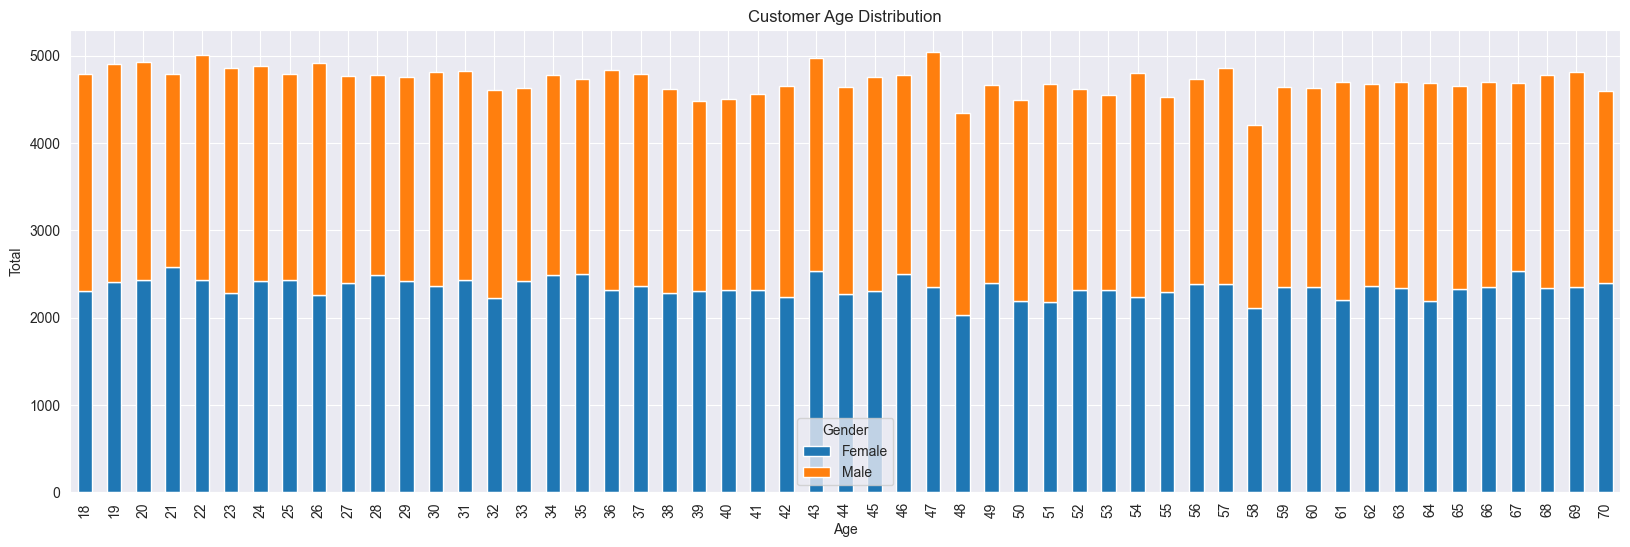

In [368]:
df_grouped = df.groupby(['Age', 'Gender']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(20, 6))
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Total') 
plt.show()

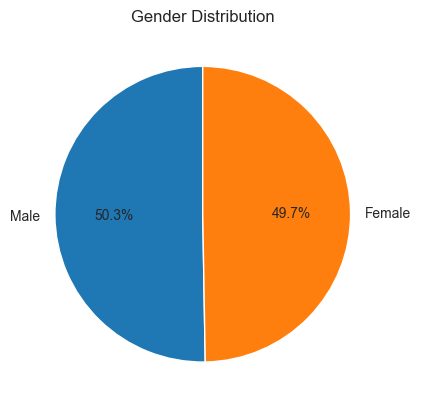

In [369]:
gender_distribution = df['Gender'].value_counts()
# gender_distribution
plt.plot(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

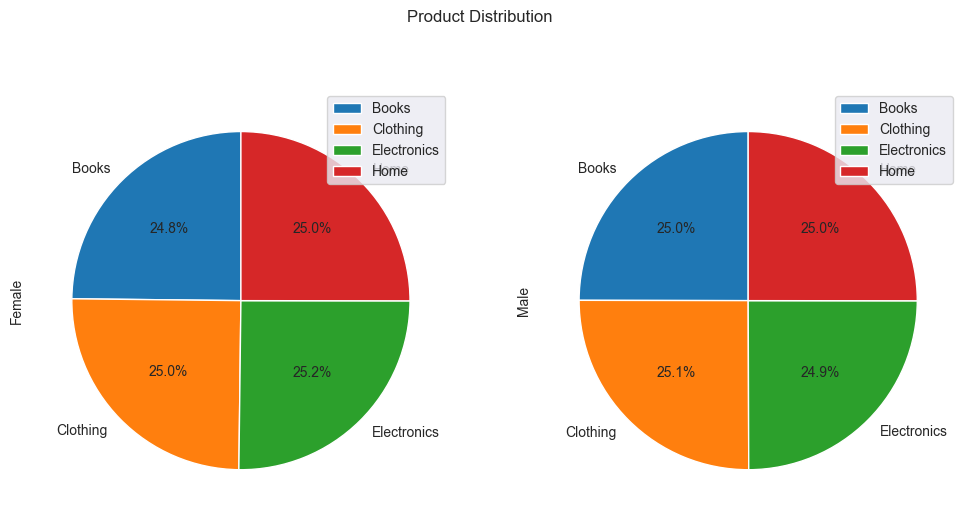

In [370]:
product_category_grouped = df.groupby(['Product Category', 'Gender']).size().unstack()
product_category_grouped.plot(kind='pie', subplots=True, figsize=(12, 6), autopct='%1.1f%%', startangle=90)
plt.suptitle('Product Distribution')
plt.show()

# fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# axes = axes.flatten()
# 
# for i, (product, row) in enumerate(product_category_grouped.iterrows()):
#     row.plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=140)
#     axes[i].set_title(f'Product Category {product}')
# 
# plt.show()

In [371]:
df_cloned = df.copy(deep=True)
df_cloned.head(10)

,Customer ID,Purchase Date,Date,Time,Product Category,Product Price,Quantity,Total Purchase,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,2023-05-03,21:30:02,Home,177,1,177,PayPal,no,John Rivera,31,Female,yes
1,44605,2021-05-16 13:57:44,2021-05-16,13:57:44,Electronics,174,3,522,PayPal,no,John Rivera,31,Female,yes
2,44605,2020-07-13 06:16:57,2020-07-13,06:16:57,Books,413,1,413,Credit Card,no,John Rivera,31,Female,yes
3,44605,2023-01-17 13:14:36,2023-01-17,13:14:36,Electronics,396,3,1188,Cash,yes,John Rivera,31,Female,yes
4,44605,2021-05-01 11:29:27,2021-05-01,11:29:27,Books,259,4,1036,PayPal,no,John Rivera,31,Female,yes
5,13738,2022-08-25 06:48:33,2022-08-25,06:48:33,Home,191,3,573,Credit Card,no,Lauren Johnson,27,Female,yes
6,13738,2023-07-25 05:17:24,2023-07-25,05:17:24,Electronics,205,1,205,Credit Card,unknown,Lauren Johnson,27,Female,yes
7,13738,2023-02-05 19:31:48,2023-02-05,19:31:48,Books,370,5,1850,Cash,no,Lauren Johnson,27,Female,yes
8,13738,2021-12-21 03:29:05,2021-12-21,03:29:05,Home,12,2,24,Cash,unknown,Lauren Johnson,27,Female,yes
9,13738,2023-02-09 00:53:14,2023-02-09,00:53:14,Electronics,40,4,160,Cash,yes,Lauren Johnson,27,Female,yes


In [372]:
df_cloned["Purchase Date"] = pd.to_datetime(df_cloned["Purchase Date"])

In [373]:
df_cloned["Purchase Date"] = df_cloned["Purchase Date"].dt.year

In [374]:
df_cloned

,Customer ID,Purchase Date,Date,Time,Product Category,Product Price,Quantity,Total Purchase,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,44605,2023,2023-05-03,21:30:02,Home,177,1,177,PayPal,no,John Rivera,31,Female,yes
1,44605,2021,2021-05-16,13:57:44,Electronics,174,3,522,PayPal,no,John Rivera,31,Female,yes
2,44605,2020,2020-07-13,06:16:57,Books,413,1,413,Credit Card,no,John Rivera,31,Female,yes
3,44605,2023,2023-01-17,13:14:36,Electronics,396,3,1188,Cash,yes,John Rivera,31,Female,yes
4,44605,2021,2021-05-01,11:29:27,Books,259,4,1036,PayPal,no,John Rivera,31,Female,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023,2023-01-24,12:32:18,Home,436,1,436,Cash,yes,Gabriel Williams,63,Male,yes
249996,20455,2021,2021-06-04,05:45:25,Electronics,233,1,233,Credit Card,no,Barry Foster,66,Female,yes
249997,28055,2022,2022-11-10,17:11:57,Electronics,441,5,2205,Cash,unknown,Lisa Johnson,63,Female,yes
249998,15023,2021,2021-06-27,14:42:12,Electronics,44,2,88,Cash,no,Melissa Fernandez,64,Male,yes
